In [1]:
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
from matplotlib import gridspec

# plot the visuals in ipython
%matplotlib inline


In [2]:
probs=[
# 	"koza_01",
# 	"koza_02",
# 	"koza_03",
# 	"lipson_01",
# 	"lipson_02",
# 	"lipson_03",

# 	"nguyen_01",
# 	"nguyen_02",
# 	"nguyen_03",
	"nguyen_04",
	"nguyen_05",
# 	"nguyen_06",
# 	"nguyen_07",
# 	"nguyen_08",
    
	"nguyen_09",
# 	"nguyen_10",
# 	"nguyen_11",
	"nguyen_12",

# 	"korns_01",
# 	"korns_02",
	"korns_03",
# 	"korns_04",
# 	"korns_05",
# 	"korns_06",
# 	"korns_07",
# 	"korns_08",
# 	"korns_09",
# 	"korns_10",
# 	"korns_11",
# 	"korns_12",
# 	"korns_13",
# 	"korns_14",
# 	"korns_15"
]


In [10]:
directory = "/Users/tony/pypge/experiments/output/eval_speedup/"

def process_setting_dir(s):
    cdata = {}
    for p in probs:
        prob_out_dir = directory + "config_explicit_" + s + ".yml/clean/" + p + "/out/"
        cdf = pd.read_csv(prob_out_dir + "pge_errs.log", delim_whitespace=True)
        cdata[p] = cdf

    pdf = pd.Panel(cdata)
    return pdf



01 loaded
02 loaded
03 loaded
04 loaded
06 loaded
08 loaded
12 loaded
16 loaded
     korns_03  nguyen_04  nguyen_05  nguyen_09  nguyen_12
01  3178.8164   451.0441   486.6885  1384.7908  1509.9520
02  2175.0161   367.9760   418.6877   984.5612  1012.4621
03  1827.7827   342.0153   403.0293   860.7115   853.9768
04  1664.4488   319.5036   392.9914   785.7085   771.7573
06  1481.9072   309.2777   381.9089   724.1762   689.3633
08  1440.5418   308.7353   380.2132   683.0104   651.2897
12  1398.7041   303.2191   379.0070   662.6809   619.7311
16  1381.7645   307.9978   385.0149   664.4762   639.3620
done


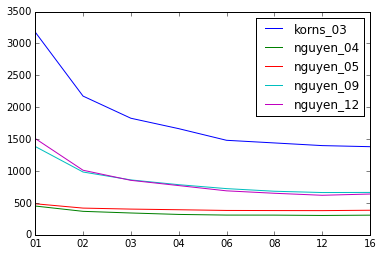

In [25]:
settings = [
    "01",
    "02",
    "03",
    "04",
    "06",
    "08",
    "12",
    "16",
]

time_data = pd.DataFrame()
for i,s in enumerate(settings):
    sdata = process_setting_dir(s)
    tdata = sdata.major_xs(24).T
    ts = tdata["elapsed_seconds"]
#     print ts
    time_data[s] = ts
#     ys = tdata.minor_xs("elapsed_seconds")
#     print ys.iloc(-1)

time_data = time_data.T
print time_data

# td2 = time_data / time_data.iloc

time_data.plot()

print "done"


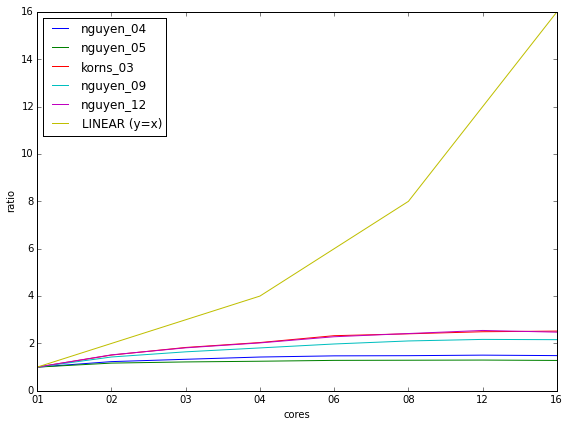

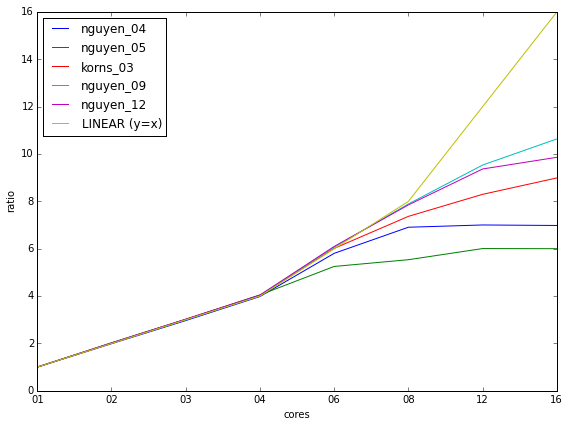

In [98]:
def process_timing_files(s):
    cdata = {}
    for p in probs:
        prob_out_dir = directory + "config_explicit_" + s + ".yml/clean/" + p + "/out/"
        fname = prob_out_dir + "pge_main.log"
        with open(fname) as f:
            content = f.readlines()
            content = [line for line in content if "-1" not in line]
            cdata[p] = content
    return cdata

def cdata_to_df(cdata):
    cols = ["loop_sum", "expd_sum","eval_sum","heap_sum","other_sum", "non_eval_sum"]
    df = pd.DataFrame(index=cols)
    for key in cdata:
        content = cdata[key]
        loop_lines = [line for line in content if "total loop time" in line]
        loop_times = []
        for line in loop_lines:
            tokens = [token.strip() for token in line.strip().split()]
            loop_times.append(tokens[-5])
        loop_sum = 0.0
        for t in loop_times:
            loop_sum += float(t)

        expd_lines = [line for line in content if "popped" in line]
        expd_times = []
        for line in expd_lines:
            tokens = [token.strip() for token in line.strip().split()]
            expd_times.append(tokens[-5])
        expd_sum = 0.0
        for t in expd_times:
            expd_sum += float(t)
            
        eval_lines = [line for line in content if "evaling" in line]
        eval_times = []
        for line in eval_lines:
            tokens = [token.strip() for token in line.strip().split()]
            eval_times.append(tokens[-5])
        eval_sum = 0.0
        for t in eval_times:
            eval_sum += float(t)

        heap_lines = [line for line in content if "popping" in line]
        heap_times = []
        for line in heap_lines:
            tokens = [token.strip() for token in line.strip().split()]
            heap_times.append(tokens[-5])
        heap_sum = 0.0
        for t in heap_times:
            heap_sum += float(t)
            
        other_sum = loop_sum - (expd_sum+eval_sum+heap_sum)
        non_eval_sum = loop_sum - eval_sum
            
        df[key] = [loop_sum, expd_sum,eval_sum,heap_sum,other_sum, non_eval_sum]
    df = df.T
    return df
            
data = {}
for i,s in enumerate(settings):
    cdata = process_timing_files(s)
    df = cdata_to_df(cdata)
#     print df
    data[s] = df

panel = pd.Panel.from_dict(data, orient='items')
# for p in panel:
#     print panel[p]
    
total_df = panel.minor_xs("loop_sum").T
total_df["LINEAR (y=x)"] = [16,8,16/3.,4,16/6.,2,16/12.,1]

eval_df = panel.minor_xs("eval_sum").T
eval_df["LINEAR (y=x)"] = [16,8,16/3.,4,16/6.,2,16/12.,1]

def plot_speedup(df, title):
    dfT = df.T
    su = pd.DataFrame()

    for key in dfT:
        su[key] = dfT["01"] / dfT[key]

    fig = plt.figure()
    fig.set_size_inches(8,6)
    gs = gridspec.GridSpec(1,1)
    ax = fig.add_subplot(gs[:,:])
    ax.set_xlabel('cores')
    ax.set_ylabel('ratio')
    
    su.T.plot(ax=ax)
    
    plt.tight_layout()
    plt.savefig("images/"+title+".png", dpi=200)
    plt.show()

plot_speedup(total_df, "total_speedup")
plot_speedup(eval_df, "eval_speedup")

<class 'pandas.core.panel.Panel'>
Dimensions: 8 (items) x 5 (major_axis) x 6 (minor_axis)
Items axis: 01 to 16
Major_axis axis: nguyen_04 to nguyen_12
Minor_axis axis: loop_sum to non_eval_sum
<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 8 (major_axis) x 5 (minor_axis)
Items axis: loop_sum to non_eval_sum
Major_axis axis: 01 to 16
Minor_axis axis: nguyen_04 to nguyen_12


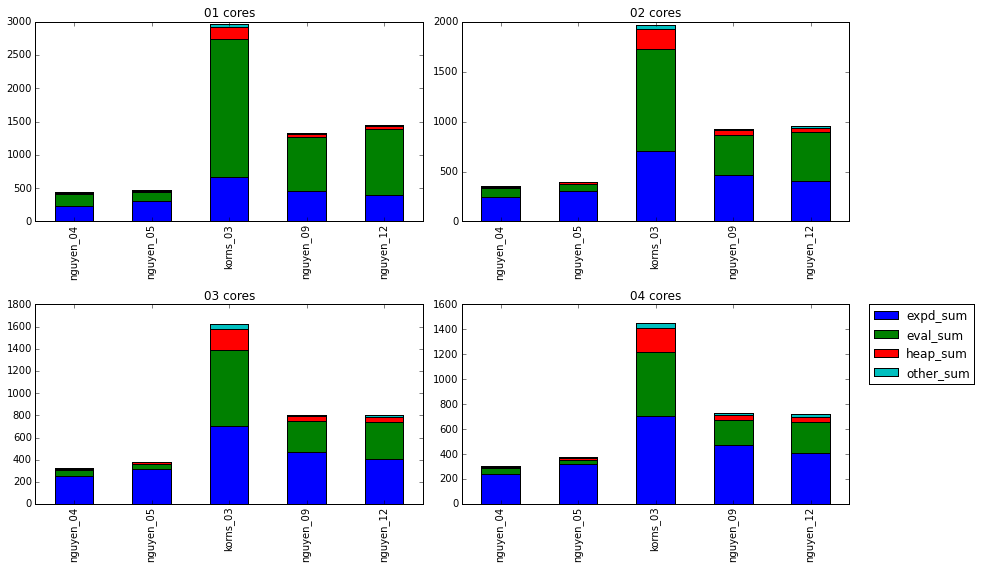

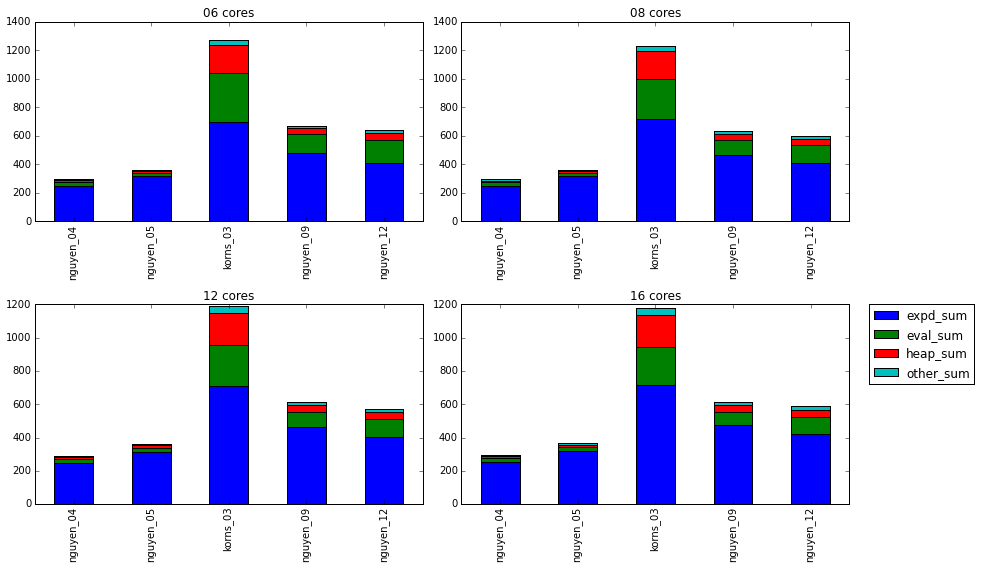

In [123]:
print panel

pT = panel.transpose(2, 0, 1)

print pT

cols = ["expd_sum","eval_sum","heap_sum","other_sum"]

fig = plt.figure()
fig.set_size_inches(12,8)
gs = gridspec.GridSpec(2,2)

for i,key in enumerate(["01","02","03","04"]):
    x,y = i%2, i//2
    ax = fig.add_subplot(gs[y,x])
    ax.set_title(key + " cores")
#     ax.set_ylim([0,100])

    df = pT.major_xs(key)
    df1 = df[cols]
#     for key in df1:
#         df1[key] = df1[key] / df["loop_sum"] * 100.0
    df1.plot(kind='bar', stacked=True, ax=ax, legend=False);
    
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig("images/speedup_timings_low.png", dpi=200, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()


fig = plt.figure()
fig.set_size_inches(12,8)
gs = gridspec.GridSpec(2,2)

for i,key in enumerate(["06","08","12","16"]):
    x,y = i%2, i//2
    ax = fig.add_subplot(gs[y,x])
    ax.set_title(key + " cores")
#     ax.set_ylim([0,100])

    df = pT.major_xs(key)
    df1 = df[cols]
#     for key in df1:
#         df1[key] = df1[key] / df["loop_sum"] * 100.0
    df1.plot(kind='bar', stacked=True, ax=ax, legend=False);
    
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig("images/speedup_timings_high.png", dpi=200, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

<class 'pandas.core.panel.Panel'>
Dimensions: 5 (items) x 8 (major_axis) x 6 (minor_axis)
Items axis: nguyen_04 to nguyen_12
Major_axis axis: 01 to 16
Minor_axis axis: loop_sum to non_eval_sum
     loop_sum    expd_sum    eval_sum   heap_sum  other_sum  non_eval_sum
01  1457.0303  396.182611  995.781871  45.120605  19.945213    461.248429
02   960.1109  403.300984  492.672789  44.435511  19.701616    467.438111
03   802.8851  409.897204  329.273145  43.948629  19.766121    473.611955
04   720.4714  409.898854  246.244365  44.475655  19.852527    474.227035
06   638.2827  410.611368  163.379688  43.452105  20.839539    474.903012
08   602.5517  410.241945  126.850121  44.610831  20.848803    475.701579
12   571.8075  402.588545  106.302193  43.261053  19.655709    465.505307
16   588.3233  421.404894  100.989649  45.859412  20.069345    487.333651


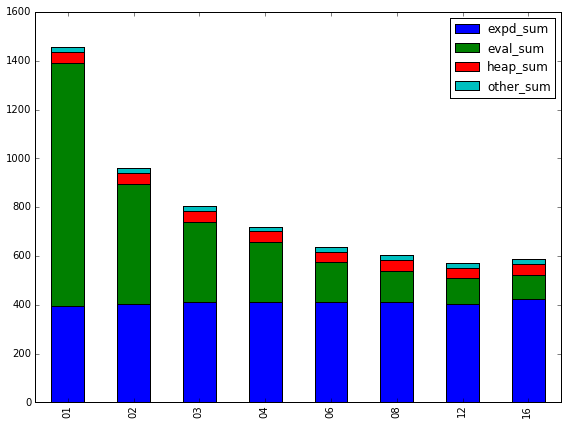

In [130]:
pT2 = panel.transpose(1, 0, 2)
print pT2
NAME = "nguyen_12"
df = pT2[NAME]

print df

cols = ["expd_sum","eval_sum","heap_sum","other_sum"]

fig = plt.figure()
fig.set_size_inches(8,6)
gs = gridspec.GridSpec(2,2)
ax = fig.add_subplot(gs[:,:])

df[cols].plot(kind='bar', stacked=True, ax=ax)

plt.tight_layout()
plt.savefig("images/speedup_timings_" + NAME + ".png", dpi=200)
plt.show()